# 深度学习基础

## 1.从零开始训练 猫狗识别 模型

## 数据集准备

![tree.png](images/tree.png)

In [2]:
import os, shutil

# 下载 dogs-vs-cats 数据集并解压 train.zip
original_dataset_dir = 'dogs-vs-cats/train/'

# 设置数据集各级目录名称
base_dir = 'data'
data_dirs = ['train', 'validation', 'test']
class_dirs = ['cat', 'dog']

# 分别设置训练、验证和测试数据集的图像文件区间
images = {
    'train': [0, 1000],
    'validation': [1000, 1500],
    'test': [1500, 2000],
}

for d in data_dirs:
    for c in class_dirs:
        # 构造数据集目录，格式示例：'data/train/dog/'
        dataset_dir = f"{base_dir}/{d}/{c}/"
        os.makedirs(dataset_dir, exist_ok=True)
        # 构造图像文件名称，格式示例：'cat.1.jpg'
        fnames = [f'{c}.{i}.jpg' for i in range(images[d][0], images[d][1])]
        # 将挑选的图像文件拷贝到对应的数据集目录下
        for fname in fnames:
            shutil.copyfile(original_dataset_dir+fname, dataset_dir+fname)

## 模型构建

![model.png](images/model.png)


In [3]:
from keras import models, layers, optimizers

model = models.Sequential() 

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) 

model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

## 模型编译

In [5]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## 数据预处理

(1) 读取图像文件。

(2) 将 JPEG 文件解码为 RGB 像素网格。

(3) 将这些像素网格转换为浮点数张量。

(4) 将像素值(0~255 范围内)缩放到 [0, 1] 区间。

In [22]:
from keras.preprocessing.image import ImageDataGenerator

# 使用 ImageDataGenerator 从目录中读取图像
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 创建训练集数据生成器，猫和狗各1000张
train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# 创建验证集数据生成器，猫和狗各500张
test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
for data_batch, labels_batch in train_generator:
    print(f'data_batch.shape:{data_batch.shape}')
    print(f'labels_batch.shape:{labels_batch.shape}')
    break

data_batch.shape:(20, 150, 150, 3)
labels_batch.shape:(20,)


## 模型训练

In [25]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=50,
                              epochs=30,
                              validation_data=test_generator,
                              validation_steps=50)

Epoch 1/30
50/50 [==============================] - 32s 649ms/step - loss: 0.6435 - acc: 0.6330 - val_loss: 0.6443 - val_acc: 0.6430
Epoch 2/30
50/50 [==============================] - 33s 666ms/step - loss: 0.6124 - acc: 0.6560 - val_loss: 0.6466 - val_acc: 0.5970
Epoch 3/30
50/50 [==============================] - 35s 699ms/step - loss: 0.6025 - acc: 0.6740 - val_loss: 0.6502 - val_acc: 0.5970
Epoch 4/30
50/50 [==============================] - 35s 707ms/step - loss: 0.5903 - acc: 0.6920 - val_loss: 0.6044 - val_acc: 0.6730
Epoch 5/30
50/50 [==============================] - 35s 708ms/step - loss: 0.5818 - acc: 0.6880 - val_loss: 0.5960 - val_acc: 0.6760
Epoch 6/30
50/50 [==============================] - 36s 726ms/step - loss: 0.5609 - acc: 0.7080 - val_loss: 0.5854 - val_acc: 0.6870
Epoch 7/30
50/50 [==============================] - 39s 782ms/step - loss: 0.5359 - acc: 0.7350 - val_loss: 0.6485 - val_acc: 0.6550
Epoch 8/30
50/50 [==============================] - 40s 809ms/step - 

## 模型保存

In [26]:
model.save('cats_and_dogs_small_1.h5')

## 模型评估

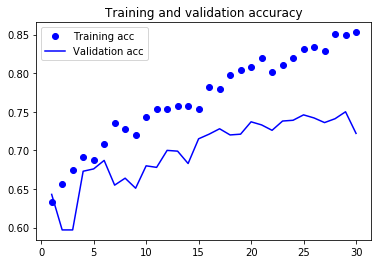

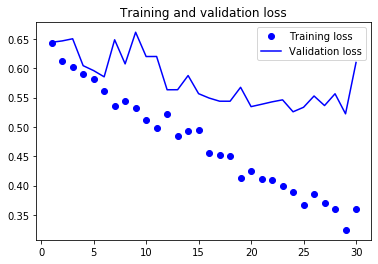

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy')
plt.legend()
    
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 2. 数据增强：举一反三造数据


使用 ImageDataGenerator 来设置数据增强
* rotation_range 是角度值(在 0~180 范围内)，表示图像随机旋转的角度范围。
* width_shift 和 height_shift 是图像在水平或垂直方向上平移的范围(相对于总宽
度或总高度的比例)。
* shear_range 是随机错切变换的角度。
* zoom_range 是图像随机缩放的范围。
* horizontal_flip 是随机将一半图像水平翻转。如果没有水平不对称的假设(比如真
实世界的图像)，这种做法是有意义的。
* fill_mode 是用于填充新创建像素的方法，这些新像素可能来自于旋转或宽度 / 高度平移。 我们来看一下增强后的图像(见图 5-11)。

In [28]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

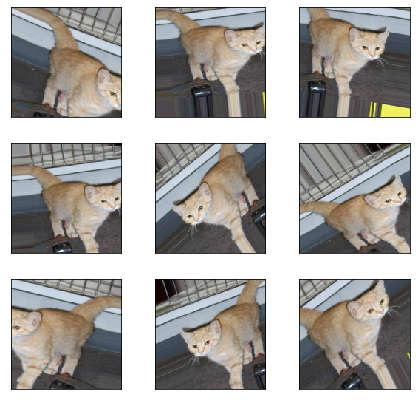

In [29]:
from keras.preprocessing import image

train_cat_dir = 'data/train/cat'
fnames = [f'{train_cat_dir}/{fname}'
          for fname in os.listdir(train_cat_dir)]

img_path = fnames[100]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

# 绘制9张随机增强后的图像
fig = plt.figure(figsize=(6,6))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    plt.subplot(3,3, i+1)
    plt.tight_layout() # 自动适配子图尺寸
    plt.imshow(image.array_to_img(batch[0]))    
    plt.xticks([]) # 删除x轴标记
    plt.yticks([]) # 删除y轴标记
    if i == 8:
        break

plt.show()

## 构建新模型

In [30]:
from keras import models, layers, optimizers

model = models.Sequential() 

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) 

# 在全连接前新增 Dropout 层
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [31]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=30,
    validation_data=test_generator,
    validation_steps=50)

Epoch 1/30
50/50 [==============================] - 51s 1s/step - loss: 0.7026 - acc: 0.4894 - val_loss: 0.6932 - val_acc: 0.4994
Epoch 2/30
50/50 [==============================] - 54s 1s/step - loss: 0.6884 - acc: 0.5363 - val_loss: 0.6911 - val_acc: 0.4981
Epoch 3/30
50/50 [==============================] - 61s 1s/step - loss: 0.6937 - acc: 0.5387 - val_loss: 0.6795 - val_acc: 0.6256
Epoch 4/30
50/50 [==============================] - 62s 1s/step - loss: 0.6851 - acc: 0.5450 - val_loss: 0.6684 - val_acc: 0.6192
Epoch 5/30
50/50 [==============================] - 57s 1s/step - loss: 0.6834 - acc: 0.5643 - val_loss: 0.6678 - val_acc: 0.5990
Epoch 6/30
50/50 [==============================] - 61s 1s/step - loss: 0.6747 - acc: 0.5769 - val_loss: 0.6571 - val_acc: 0.6218
Epoch 7/30
50/50 [==============================] - 58s 1s/step - loss: 0.6705 - acc: 0.5825 - val_loss: 0.6649 - val_acc: 0.5806
Epoch 8/30
50/50 [==============================] - 54s 1s/step - loss: 0.6648 - acc: 0.59

In [33]:
model.save('cats_and_dogs_small_2.h5')

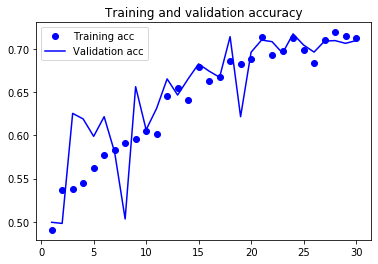

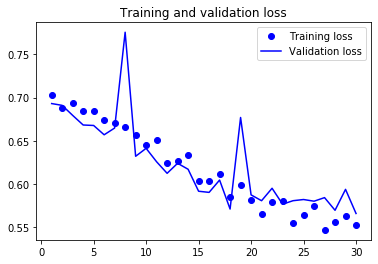

In [34]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy')
plt.legend()
    
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 3.特征提取：站在巨人肩膀上


从 VGG16 预训练模型中提取特征

In [35]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

## 3.1 快速特征提取

In [36]:
import numpy as np

from keras.preprocessing.image import ImageDataGenerator

train_dir = 'data/train'

validation_dir = 'data/validation'
test_dir = 'data/test'


datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
            directory,
            target_size=(150, 150),
            batch_size=batch_size,
            class_mode='binary')

    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [37]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [38]:
# 目前，提取的特征形状为 (samples, 4, 4, 512)。
# 我们要将其输入到密集连接分类器中， 
# 因此，必须先将其形状展平为 (samples, 8192)。
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [39]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features,
                    train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.5703 - acc: 0.6950 - val_loss: 0.4347 - val_acc: 0.8330
Epoch 2/30
2000/2000 [==============================] - 1s 621us/step - loss: 0.4198 - acc: 0.8140 - val_loss: 0.3733 - val_acc: 0.8630
Epoch 3/30
2000/2000 [==============================] - 1s 611us/step - loss: 0.3645 - acc: 0.8485 - val_loss: 0.3303 - val_acc: 0.8690
Epoch 4/30
2000/2000 [==============================] - 1s 616us/step - loss: 0.3105 - acc: 0.8700 - val_loss: 0.3086 - val_acc: 0.8760
Epoch 5/30
2000/2000 [==============================] - 1s 607us/step - loss: 0.2998 - acc: 0.8730 - val_loss: 0.2952 - val_acc: 0.8800
Epoch 6/30
2000/2000 [==============================] - 1s 603us/step - loss: 0.2672 - acc: 0.8975 - val_loss: 0.2843 - val_acc: 0.8840
Epoch 7/30
2000/2000 [==============================] - 1s 716us/step - loss: 0.2468 - acc: 0.9015 - val_loss: 0.2694 - val_acc: 0.8860
Ep

In [40]:
model.save('cats_and_dogs_small_3.h5')

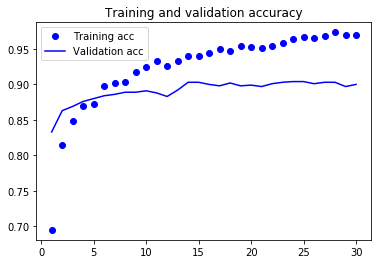

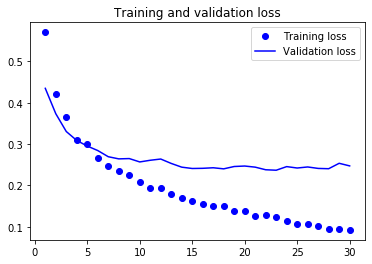

In [41]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 3.2 使用数据增强的特征提取

In [42]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [43]:
conv_base.trainable = False
model.trainable_weights

[<tf.Variable 'dense_9/kernel:0' shape=(8192, 256) dtype=float32_ref>,
 <tf.Variable 'dense_9/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_10/kernel:0' shape=(256, 1) dtype=float32_ref>,
 <tf.Variable 'dense_10/bias:0' shape=(1,) dtype=float32_ref>]

In [44]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [45]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [46]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [47]:
history = model.fit(
        train_generator,
        steps_per_epoch=50,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/30
50/50 [==============================] - 237s 5s/step - loss: 0.6490 - acc: 0.6120 - val_loss: 0.5407 - val_acc: 0.7670
Epoch 2/30
50/50 [==============================] - 251s 5s/step - loss: 0.5575 - acc: 0.7570 - val_loss: 0.4561 - val_acc: 0.8250
Epoch 3/30
50/50 [==============================] - 261s 5s/step - loss: 0.5102 - acc: 0.7620 - val_loss: 0.3957 - val_acc: 0.8490
Epoch 4/30
50/50 [==============================] - 261s 5s/step - loss: 0.4560 - acc: 0.8100 - val_loss: 0.3751 - val_acc: 0.8540
Epoch 5/30
50/50 [==============================] - 252s 5s/step - loss: 0.4434 - acc: 0.8060 - val_loss: 0.3386 - val_acc: 0.8650
Epoch 6/30
50/50 [==============================] - 259s 5s/step - loss: 0.4383 - acc: 0.7980 - val_loss: 0.3292 - val_acc: 0.8660
Epoch 7/30
50/50 [==============================] - 226s 5s/step - loss: 0.4055 - acc: 0.8290 - val_loss: 0.3146 - val_acc: 0.8690
Epoch 8/30
50/50 [==============================] - 225s 5s/step - loss: 0.3922 - a

In [48]:
model.save('cats_and_dogs_small_4.h5')

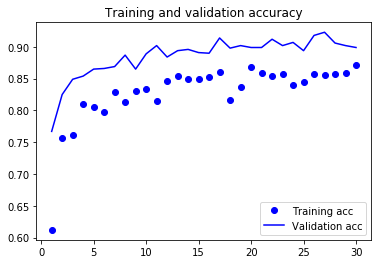

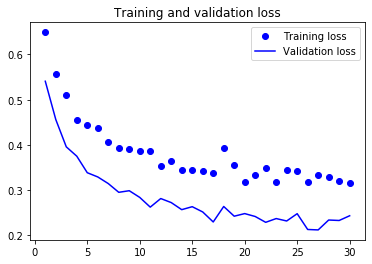

In [49]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 4. 模型微调：青出于蓝而胜于蓝

In [50]:
from keras import models
from keras import layers

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [51]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [52]:
history = model.fit(
        train_generator,
        steps_per_epoch=50,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/30
50/50 [==============================] - 269s 5s/step - loss: 0.3467 - acc: 0.8470 - val_loss: 0.1972 - val_acc: 0.9240
Epoch 2/30
50/50 [==============================] - 223s 4s/step - loss: 0.3241 - acc: 0.8720 - val_loss: 0.1659 - val_acc: 0.9340
Epoch 3/30
50/50 [==============================] - 220s 4s/step - loss: 0.2852 - acc: 0.8730 - val_loss: 0.2698 - val_acc: 0.8910
Epoch 4/30
50/50 [==============================] - 224s 4s/step - loss: 0.3063 - acc: 0.8600 - val_loss: 0.1490 - val_acc: 0.9400
Epoch 5/30
50/50 [==============================] - 259s 5s/step - loss: 0.2568 - acc: 0.8940 - val_loss: 0.1253 - val_acc: 0.9480
Epoch 6/30
50/50 [==============================] - 274s 5s/step - loss: 0.2550 - acc: 0.8900 - val_loss: 0.1214 - val_acc: 0.9510
Epoch 7/30
50/50 [==============================] - 275s 6s/step - loss: 0.2241 - acc: 0.9080 - val_loss: 0.1191 - val_acc: 0.9540
Epoch 8/30
50/50 [==============================] - 344s 7s/step - loss: 0.2106 - a

In [53]:
model.save('cats_and_dogs_small_5.h5')

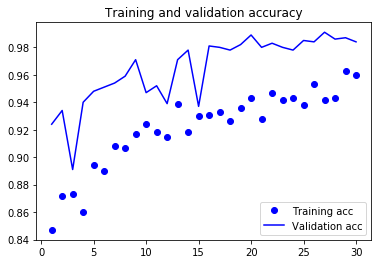

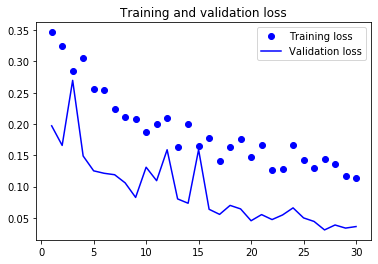

In [54]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()